The dataset link http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

We will use **SVM** with **Radial Basis Function (RBF) Kernal** for classification. The dataset contains categorical and numerical features.

**SVMs** are one of the best ML methods when getting bthe correct answer is a higher priority than understanding why you get the correct answer.

- <span style='color:green'> Importing data from a data file </span>
- <span style='color:green'> Missing data </span>
    - Identifying missing data
    - Handling missing data
- <span style='color:green'> Downsampling data </span>
- <span style='color:green'> Formating the data for Supprot Vector Machines </span>
    - Splitting the data into dependent and independent variables
    - One-Hot-Encoding
    - Centering and Scalling the data
- <span style='color:green'> Building a preliminary SVM </span>
- <span style='color:green'> Optimizing parameters with Cross-Validation </span>
    - Using Cross-validation to find best values for Gamma and Regularization
- <span style='color:green'> Building, Evaluating, Drawing and Interpreting the Final SVM </span>

Use `conda list` To check the module versions

- <span style='color:green'> Nedd Python3 and the following versions of various modules </span>
    - Pandas 1.3.4
    - Numpy  1.20.3
    - sklearn 0.24.2
    - Matplotlib 3.4.3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('default of credit card clients.xls',
                  header = 1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- **ID**, The ID number assigned to each customer]
- **LIMIT_BAL** Credit limit
- **SEX**, Gender
- **EDUCATION**, Level of Education
- **Mariage**, Marital status
- **AGE**, Age
- **PAY_**, When the last 6 bills payed
- **BILL_AMT_**, What the last 6 bills were
- **PAY_AMT**, How much the last payments were
- **default payment next month**

Note: The last column **default payment next month** is long make it to **default**

In [4]:
df.rename({'default payment next month': 'DEFAULT'}, 
          axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


ID column is randomly assigned, its not informative, so drop it.

In [5]:
df.drop('ID', axis = 1, inplace = True) # Set axis = 1 to columns and 0 to rows
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Identifying missing data

There are two main ways to deal with missing data
<dl>
<dd>1. We can remove the rows that contain missing data.</dd>
<dd>2. We can impute the values that are missed.</dd>
</dl>

Lets check what sort of data is in each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

We see that every column is int64. There are no missing values.

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- **LIM_BAL**, The amount of available credit Integer
- **SEX**, Category
<dl>
<dd>1 = male.</dd>
<dd>2 = female.</dd>
</dl>
- **Education**, Category
<dl>
<dd>1 = graduate school.</dd>
<dd>2 = university.</dd>
<dd>3 = high school. <dd>
<dd>4 = others. <dd>
</dl>
- **Mariage**, Category
<dl>
<dd>1 = married.</dd>
<dd>2 = single.</dd>
<dd>3 = others. <dd>
</dl>
- **Age**, Integer
-**PAY_**, when the last 6 bills were payed Category
<dl>
<dd> -1 = paid on time </dd>
<dd> 1 = payment delayed by 1 month </dd>
<dd> 2 = payment delayed by 2 months <dd>
<dd> .... <dd>
<dd> 9 = payment delayed by 9 months <dd>
</dl>
- **BILL_AMT**, What the last 6 bills were Integer
- **PAY_AMT**, How much the last payments were, Integer
-**DEFAULT**, Whether or not the person were defaulted for the next payment Category
<dl>
<dd> 0 = did not default </dd>
<dd> 1 = Defaulted </dd>
</dl>

In [7]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [8]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

So for unknown reasons, in addition to the allowed numbers 1,2,3 and 4, EDUCATION also contain 0,5 and 6. May be 0 represents missing data and 5 and 6 are other categories.

In [9]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

LIke EDUCATION, MARIAGE contains 0 which may represent missing values

Note: This dataset is a part of academic publication that is not open acces and is owned by Elsevier. So, assuming 0 as missing value and proceed further. To read the paper https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

### Dealing with missing data

Since Scikit-learn SVM does not support missing data, we need to figure out what we do with the 0. Either we remove the rows containing these values or impute the missing data. First lets see how many rows contain missing data.

In [10]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [11]:
len(df.loc[(df['DEFAULT'] == 1)])

6636

Since only 68 rows have missing values. Now lets count the total number rows in the dataset

In [12]:
len(df)

30000

So 68 of 30000 samples, or less than 1% contain missing values. Since that still leaves us with more data that required for **SVM**. We will remove rows with the missing values rather than impute the data.

In [13]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [14]:
df_no_missing['DEFAULT'].unique()

array([1, 0], dtype=int64)

In [15]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

And we can also do same with the MARRIAGE

In [16]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

df_no_missing has no missing values

## Downsample the data

SVMs are great with small datasets, but not awesome with large data, and this dataset not huge, large enough to take a long time for **cross validation**. So, we'll downsample both categories, customers who did and who did not default to 1000 each.

In [17]:
len(df_no_missing)

29932

Split the data into two dataframes, one containing did not default and one for default.

In [18]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

Now downsample the dataset that did not default

In [19]:
df_no_default_downsampled = resample(df_no_default,
                                   replace = False,
                                   n_samples = 1000,
                                   random_state =42)
df_no_default_downsampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0


In [20]:
df_default_downsampled = resample(df_default,
                                   replace = False,
                                   n_samples = 1000,
                                   random_state =42)
df_default_downsampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
19982,300000,2,1,1,47,3,2,2,2,2,...,5000,5000,5000,0,0,0,0,0,0,1
19350,80000,2,2,2,36,2,0,0,-2,-2,...,0,0,0,1700,0,0,0,0,0,1
17057,30000,2,3,2,22,2,2,0,0,0,...,29507,11609,11711,0,1687,1147,524,400,666,1
26996,80000,1,1,2,34,2,2,2,2,2,...,64682,65614,67007,2800,3000,2500,2600,2600,2600,1
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,...,0,5646,14793,13462,17706,0,5646,14793,7376,1


In [21]:
df_downsample = pd.concat([df_no_default_downsampled, 
                          df_default_downsampled])
len(df_downsample)

2000

In [22]:
df_downsample['DEFAULT'] == 0

641       True
4678      True
16004     True
22974     True
17535     True
         ...  
6154     False
14072    False
5387     False
23192    False
8180     False
Name: DEFAULT, Length: 2000, dtype: bool

In [23]:
x = df_downsample.drop(['DEFAULT'], axis = 1).copy()
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [24]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

### One_Hot_Encoding

SEX, EDUCATION, MARRIAGE and PAY_ seems to be categorical and needs to be modified. We use **one_hot_encoding**

There are many different ways to do **one_hot_encoding** in Python. 
ColumnTransformer (from sklearn) and get_dummies (from pandas) and both methods have pros and cons

In [25]:
pd.get_dummies(x, columns = ['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [26]:
x_encoded = pd.get_dummies(x, columns = ['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
x_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


Divide data into training and test datasets,

We split the data into training and test set and then scale them seperately to avoid **Data Leakage**.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y,
                                                    random_state = 42)
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

### Build a Preliminary Support Vector Machine

In [28]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(x_train_scaled, y_train)

SVC(random_state=42)

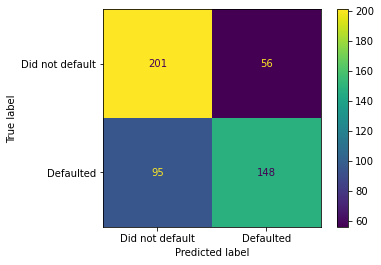

In [29]:
plot_confusion_matrix(clf_svm,
                     x_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not default', 'Defaulted']);

### Optimize parameters with Cross Validation and GridSearchCV()

In [30]:
param_grid = [
    {'C': [0.5, 1, 10, 100], # Note: C must be greater than 0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf']}
]

In [31]:
optimal_params = GridSearchCV(
                            SVC(),
                            param_grid,
                            cv = 5,
                            scoring = 'accuracy',
                            verbose = 2)

In [32]:
optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.5, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.5, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.5, gamma=0.

[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END ...................

### Building, Evaluating, Drawing and Interpreting the final Support Vector Machine

In [33]:
clf_svm = SVC(random_state = 42,
             C = 100, gamma = 0.001)
clf_svm.fit(x_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

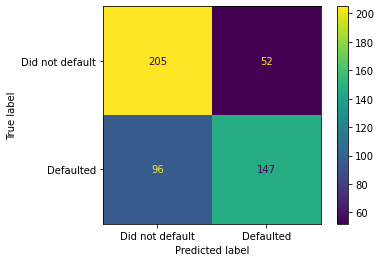

In [34]:
plot_confusion_matrix(clf_svm,
                     x_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not default', 'Defaulted']);

In [35]:
len(df_downsample.columns)

24

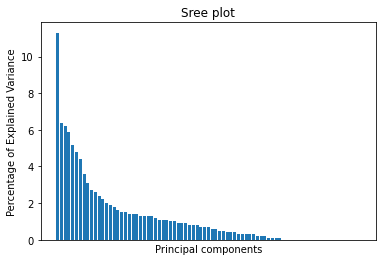

In [36]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
per_var = np.round(pca.explained_variance_ratio_ *100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x = range(1, len(per_var)+1), height = per_var)
plt.tick_params(
                axis = 'x',
                which = 'both',
                bottom = False,
                top = False,
                labelbottom = False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal components')
plt.title('Sree plot')
plt.show()